In [85]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [86]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import urllib
import math
import datetime as dt
from datetime import datetime
from pandas import datetime
from sklearn.model_selection import train_test_split
import datetime
from IPython.display import display
import random
import seaborn as sns
from collections import Counter

%matplotlib inline 
plt.rcParams['figure.figsize'] = (5, 5)

np.random.seed(0)
os.getcwd()

'/Users/parksoy/Desktop/certace'

# Data exploration

In [87]:
df = pd.read_csv('./data/certace.csv',parse_dates=True,index_col="ID") #ile_path,parse_dates=True,index_col="Date", usecols=["Date", "Adj Close"],na_values=["nan"]
display(df[:3]) 
display(df[-3:])

,Price,Date,Postcode,Property_Type,Old_New,Duration,Street,Locality,Town,District,County,PPD_Category_Type
ID,,,,,,,,,,,,
0,117000.0,1995-01-01,SW17 9QF,T,N,F,196 CROWBOROUGH ROAD,LONDON,LONDON,WANDSWORTH,GREATER LONDON,A
1,40000.0,1995-01-03,EN1 1DN,F,N,L,"7 POYNTER ROAD, FLAT B",NaN,ENFIELD,ENFIELD,GREATER LONDON,A
2,31000.0,1995-01-03,DE22 3SE,T,N,F,69 WOLFA STREET,DERBY,DERBY,DERBY,DERBYSHIRE,A


,Price,Date,Postcode,Property_Type,Old_New,Duration,Street,Locality,Town,District,County,PPD_Category_Type
ID,,,,,,,,,,,,
99997,NaN,2016-04-22,LA18 5BX,T,N,F,2 NEWTON TERRACE,NaN,MILLOM,COPELAND,CUMBRIA,B
99998,NaN,2016-04-25,IP29 5EW,D,N,F,"GLENDOWIE, DENHAM ROAD",DENHAM,BURY ST EDMUNDS,ST EDMUNDSBURY,SUFFOLK,A
99999,NaN,2016-04-25,GL56 0JE,S,N,F,2 COTSMORE CLOSE,NaN,MORETON-IN-MARSH,COTSWOLD,GLOUCESTERSHIRE,A


In [88]:
display(list(df.columns))

['Price',
 'Date',
 'Postcode',
 'Property_Type',
 'Old_New',
 'Duration',
 'Street',
 'Locality',
 'Town',
 'District',
 'County',
 'PPD_Category_Type']

# Transform categorical data to numerical data 

In [89]:
from sklearn.preprocessing import LabelEncoder

number=LabelEncoder()

df['Postcode_num']=number.fit_transform(df['Postcode'].astype('str'))
df['Property_Type_num']=number.fit_transform(df['Property_Type'].astype('str'))
df['Old_New_num']=number.fit_transform(df['Old_New'].astype('str'))
df['Duration_num']=number.fit_transform(df['Duration'].astype('str'))
df['Street_num']=number.fit_transform(df['Street'].astype('str'))
df['Locality_num']=number.fit_transform(df['Locality'].astype('str'))
df['Town_num']=number.fit_transform(df['Town'].astype('str'))
df['District_num']=number.fit_transform(df['District'].astype('str'))
df['County_num']=number.fit_transform(df['County'].astype('str'))
df['PPD_Category_Type_num']=number.fit_transform(df['PPD_Category_Type'].astype('str'))

display(df[:5])

,Price,Date,Postcode,Property_Type,Old_New,Duration,Street,Locality,Town,District,...,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num
ID,,,,,,,,,,,,,,,,,,,,,
0,117000.0,1995-01-01,SW17 9QF,T,N,F,196 CROWBOROUGH ROAD,LONDON,LONDON,WANDSWORTH,...,78573,4,0,0,24330,4778,597,405,46,0
1,40000.0,1995-01-03,EN1 1DN,F,N,L,"7 POYNTER ROAD, FLAT B",NaN,ENFIELD,ENFIELD,...,26750,1,0,1,72840,8909,355,139,46,0
2,31000.0,1995-01-03,DE22 3SE,T,N,F,69 WOLFA STREET,DERBY,DERBY,DERBY,...,21543,4,0,0,71333,2208,313,113,36,0
3,76000.0,1995-01-03,W2 6HD,F,N,L,"READING HOUSE, HALLFIELD ESTATE, FLAT 32",LONDON,LONDON,CITY OF WESTMINSTER,...,86141,1,0,1,92923,4778,597,90,46,0
4,19000.0,1995-01-03,M28 3LB,T,N,L,29 ALFRED STREET,WORSLEY,MANCHESTER,SALFORD,...,44559,4,0,1,38737,8794,631,316,47,0


In [90]:
del df['Property_Type']
del df['District']
del df['Postcode']
del df['Old_New']
del df['Duration']
del df['Street']
del df['Locality']
del df['Town']
del df['County']
del df['PPD_Category_Type']
display(df[:5])

,Price,Date,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num
ID,,,,,,,,,,,,
0,117000.0,1995-01-01,78573,4,0,0,24330,4778,597,405,46,0
1,40000.0,1995-01-03,26750,1,0,1,72840,8909,355,139,46,0
2,31000.0,1995-01-03,21543,4,0,0,71333,2208,313,113,36,0
3,76000.0,1995-01-03,86141,1,0,1,92923,4778,597,90,46,0
4,19000.0,1995-01-03,44559,4,0,1,38737,8794,631,316,47,0


## Convert date to numerical "date-day1"

In [91]:
#convert datetime to float
df['Date'] = pd.to_datetime(df['Date'])    
df['Date_delta'] = (df['Date'] - df['Date'].min()) / np.timedelta64(1,'D')
display(df['Date_delta'][:5])

ID
0    0.0
1    2.0
2    2.0
3    2.0
4    2.0
Name: Date_delta, dtype: float64

In [92]:
del df['Date']
display(df[:5])

,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
ID,,,,,,,,,,,,
0,117000.0,78573,4,0,0,24330,4778,597,405,46,0,0.0
1,40000.0,26750,1,0,1,72840,8909,355,139,46,0,2.0
2,31000.0,21543,4,0,0,71333,2208,313,113,36,0,2.0
3,76000.0,86141,1,0,1,92923,4778,597,90,46,0,2.0
4,19000.0,44559,4,0,1,38737,8794,631,316,47,0,2.0


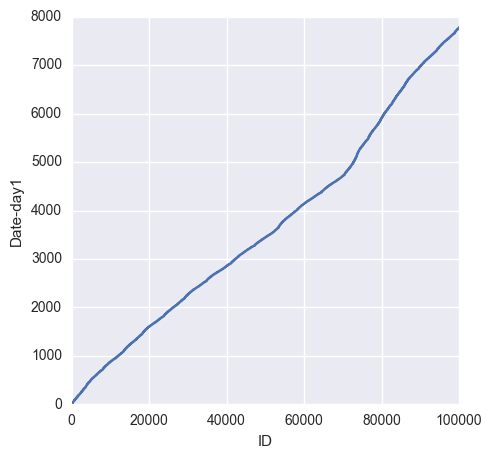

In [93]:
#Check if any date in wrong order
fig,ax=plt.subplots(1)

ax.plot(df['Date_delta'])
ax.set_xlabel('ID')
ax.set_ylabel('Date-day1')
plt.show()

# Get index of train, question set

In [94]:
index_question = df['Price'].index[df['Price'].apply(np.isnan)]
index_question_list=list(index_question)
print index_question[:5]
print type(list(index_question))

Int64Index([98818, 98819, 98820, 98821, 98822], dtype='int64', name=u'ID')
<type 'list'>


In [95]:
index_train=[item for item in list(df.index.values) if item not in index_question_list]
print index_train[:5]

[0, 1, 2, 3, 4]


##  Split df into "df_train/df_test", df_question(NaN)

In [96]:
print df.iloc[index_question_list].shape
df_question=df.iloc[index_question_list]
display(df_question[:3])

(1182, 12)


,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
ID,,,,,,,,,,,,
98818,NaN,74491,1,0,1,3608,8767,893,351,98,0,7673.0
98819,NaN,42459,2,0,0,267,8909,547,208,119,1,7674.0
98820,NaN,68130,4,0,0,49108,4373,1121,18,82,0,7674.0


In [97]:
df_train=df.iloc[index_train]
display(df_train[:3])

,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
ID,,,,,,,,,,,,
0,117000.0,78573,4,0,0,24330,4778,597,405,46,0,0.0
1,40000.0,26750,1,0,1,72840,8909,355,139,46,0,2.0
2,31000.0,21543,4,0,0,71333,2208,313,113,36,0,2.0


# Split feature and target
#### trainset into (1) df_train_feature, (2) df_train['Price'] for train-test set

In [98]:
#Create feature set
df_train_feature=df_train[['Date_delta', 'Postcode_num', 'Property_Type_num', 
                           'Old_New_num', 'Duration_num', 'Street_num', 
                           'Locality_num', 'Town_num', 'District_num', 
                           'County_num', 'PPD_Category_Type_num']]
display(df_train_feature[:3])

df_question_feature=df_question[['Date_delta', 'Postcode_num', 'Property_Type_num', 
                                 'Old_New_num', 'Duration_num', 'Street_num', 
                                 'Locality_num', 'Town_num', 'District_num', 
                                 'County_num', 'PPD_Category_Type_num']]
display(df_question_feature[:3])
df_question_feature.describe()

# Split cross validation set
X_train, X_test, y_train, y_test = train_test_split(df_train_feature, df_train['Price'], test_size=0.4, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

,Date_delta,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num
ID,,,,,,,,,,,
0,0.0,78573,4,0,0,24330,4778,597,405,46,0
1,2.0,26750,1,0,1,72840,8909,355,139,46,0
2,2.0,21543,4,0,0,71333,2208,313,113,36,0


,Date_delta,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num
ID,,,,,,,,,,,
98818,7673.0,74491,1,0,1,3608,8767,893,351,98,0
98819,7674.0,42459,2,0,0,267,8909,547,208,119,1
98820,7674.0,68130,4,0,0,49108,4373,1121,18,82,0


(59290, 11) (39528, 11) (59290,) (39528,)


## very base regression before feature normalization

****regressor==***** <class 'sklearn.ensemble.forest.RandomForestRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.944702311679
RMSE== 0.182270191465

****Evaluation of regression in testset****
R^2 == 0.694713281274
RMSE== 0.427606682317
****regressor==***** <class 'sklearn.tree.tree.DecisionTreeRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.487703011509
RMSE== 0.554782895741

****Evaluation of regression in testset****
R^2 == 0.492391116797
RMSE== 0.551385237989
****regressor==***** <class 'sklearn.neighbors.regression.KNeighborsRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.645700660205
RMSE== 0.46136785566

****Evaluation of regression in testset****
R^2 == 0.286730836991
RMSE== 0.653607838815
****regressor==***** <class 'sklearn.linear_model.base.LinearRegression'>

****Evaluation of regression in trainset****
R^2 == 0.425366139102
RMSE== 0.587567503665

****Evaluation of regression in testset****
R^2 == 0.423565910148
RMSE=

,regressor,RMSE
3,RandomForestRegressor,0.427607
0,DecisionTreeRegressor,0.551385
1,LinearRegression,0.587578
2,KNeighborsRegressor,0.653608


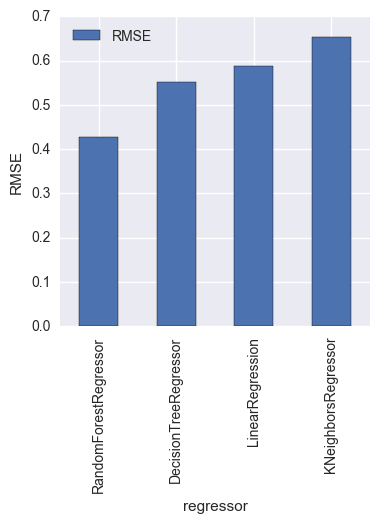

In [99]:
def train_predict_evaluate(regressor, X_train, y_train, X_test, df_question_feature_z):
    
    print "****regressor==*****",regressor.__class__
    regressor.fit(X_train, np.log(y_train)) #np_train_scaled
    
    fname_out = '{}.pickle'.format(regressor.__class__.__name__) #, datetime.now()
    with open(fname_out, 'wb') as f:
        cPickle.dump(regressor, f, -1)  
            
    y_train_pred=regressor.predict(X_train) #np_train_scaled
    y_test_pred=regressor.predict(X_test) #np_test_scaled
    y_question_pred=regressor.predict(df_question_feature_z) #np_question_scaled
   
    #Evaluation of regression
    print "\n****Evaluation of regression in trainset****"
    Rsqr=regressor.score(X_train,np.log(y_train))
    RMSE=np.sqrt((np.sum((y_train_pred-np.log(y_train))**2))/len(y_train_pred))
    print "R^2 ==",Rsqr
    print "RMSE==",RMSE

    print "\n****Evaluation of regression in testset****"
    Rsqr=regressor.score(X_test,np.log(y_test))
    RMSE=np.sqrt((np.sum((y_test_pred-np.log(y_test))**2))/len(y_test_pred))

    print "R^2 ==",Rsqr
    print "RMSE==",RMSE
    regressor_RMSE.update({regressor.__class__.__name__: RMSE})
    
    y_train_pred=np.exp(y_train_pred)
    y_test_pred=np.exp(y_test_pred)
    y_question_pred=np.exp(y_question_pred)
    
    y_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
    y_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
    y_question_pred = pd.DataFrame({'y_question_pred':y_question_pred}, index=df_question_feature_z.index)
    
    return y_train_pred, y_test_pred, y_question_pred

from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
import cPickle

rng = np.random.RandomState(1)


regressor_RMSE={}
regressor = RandomForestRegressor()
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

regressor= DecisionTreeRegressor(max_depth=4)
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

regressor = KNeighborsRegressor(n_neighbors=3)
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

'''
regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=4),n_estimators=300, random_state=rng)
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 


regressor= SVR()#C=1.0, epsilon=0.2
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 
'''

from sklearn.linear_model import LinearRegression

regressor=LinearRegression() #normalize=True
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

regressor=LinearRegression(normalize=True) #normalize=True
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

#summary of RMSE for all regressors

regressor_RMSE_df=pd.DataFrame(list(regressor_RMSE.iteritems()), columns=['regressor','RMSE'])

regressor_RMSE_df=regressor_RMSE_df.sort_values(by=['RMSE'],ascending=True)
display(regressor_RMSE_df)

ax=regressor_RMSE_df.plot(x=regressor_RMSE_df['regressor'],kind='bar',figsize=(4,4))
ax.set_ylabel('RMSE')

# Feature importance

In [100]:
regressor = RandomForestRegressor()
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 

importances=regressor.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f,col in enumerate(X_train.columns):
    print("%d. feature %s (%f)" % (f + 1, col, importances[indices[f]]))


****regressor==***** <class 'sklearn.ensemble.forest.RandomForestRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.944376998132
RMSE== 0.182805548479

****Evaluation of regression in testset****
R^2 == 0.694211561067
RMSE== 0.427957910895
Feature ranking:
1. feature Date_delta (0.386525)
2. feature Postcode_num (0.173144)
3. feature Property_Type_num (0.124038)
4. feature Old_New_num (0.105836)
5. feature Duration_num (0.069657)
6. feature Street_num (0.047058)
7. feature Locality_num (0.037665)
8. feature Town_num (0.032038)
9. feature District_num (0.013923)
10. feature County_num (0.008192)
11. feature PPD_Category_Type_num (0.001924)


# Check price distribution,  prediction error-PRETTY LARGE ERROR!

(array([ -50000.,       0.,   50000.,  100000.,  150000.,  200000.,
         250000.,  300000.]), <a list of 8 Text xticklabel objects>)

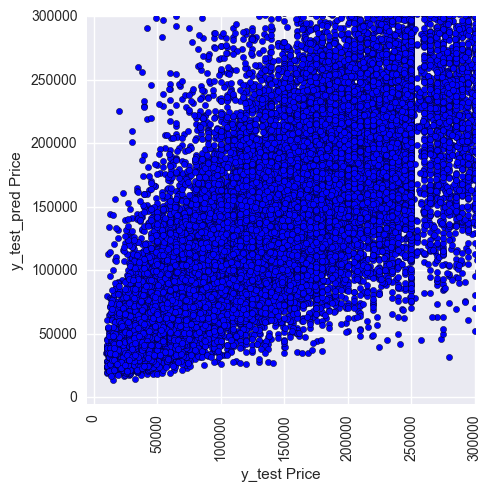

In [101]:
plt.rcParams['figure.figsize'] = (5, 5)

fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.set_xlabel('y_test Price')
ax.set_ylabel('y_test_pred Price')
ax.set_xlim([-5000,300000])
ax.set_ylim([-5000,300000])
plt.xticks(rotation='vertical')

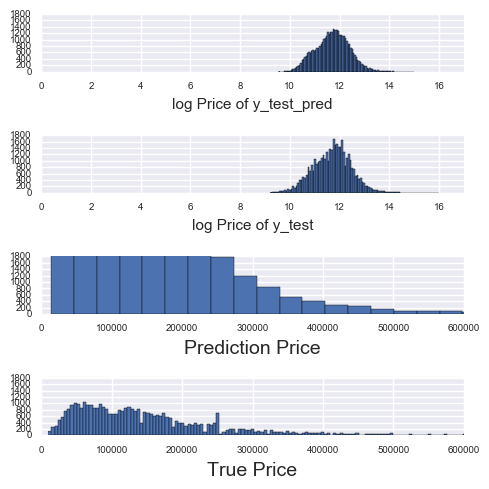

In [102]:
#Check how bad prediction is

#plt.rcParams['figure.figsize'] = (5, 10)

fig, (ax1,ax2,ax3,ax4) = plt.subplots(4)

ax1.hist(np.log(np.array(y_test_pred)),bins=100)#
ax1.set_xlabel('log Price of y_test_pred')
ax1.tick_params(axis='both', which='major', labelsize=7)
ax1.set_xlim(0,17)
ax1.set_ylim(0,1800)

ax2.hist(np.log(np.array(y_test)),bins=100)#
ax2.set_xlabel('log Price of y_test')
ax2.tick_params(axis='both', which='major', labelsize=7)
ax2.set_xlim(0,17)
ax2.set_ylim(0,1800)

ax3.hist(np.array(y_test_pred),bins=100) #
ax3.set_xlabel('Prediction Price',fontsize=14)
ax3.tick_params(axis='both', which='major', labelsize=7)
ax3.set_xlim(0,600000)
ax3.set_ylim(0,1800)


ax4.hist(np.array(y_test),bins=2000) #
ax4.set_xlabel('True Price',fontsize=14)
ax4.tick_params(axis='both', which='major', labelsize=7)
ax4.set_xlim(0,600000)
ax4.set_ylim(0,1800)


fig.tight_layout()
plt.show()

In [103]:
print y_test.shape, y_test_pred.shape

(39528,) (39528, 1)


### Problem #1. Too much spread in price in trainset. Remove outliers in trainset, PCA
### Problem #2. Overfitting. RMSE in testset>> trainset with RandomForest


# Remove outliers in trainset, PCA

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.


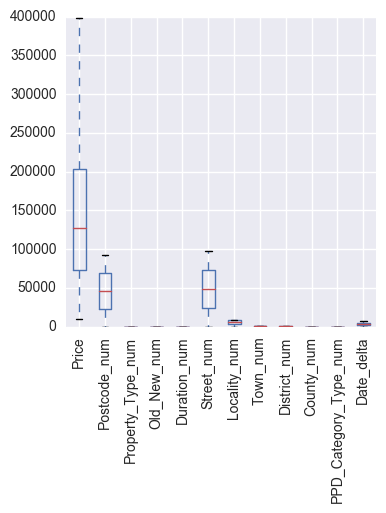

In [104]:
#plot first to see the spread/outliers
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))

df_train.boxplot()
plt.xticks(rotation='vertical')
ax.set_ylim(0,400000)

plt.show()

In [105]:
# Remove outliers

#df_train_feature 
#df_train['Price']

feature='Price'

print "df_train.shape=",df_train.shape

idx = []

Q1 = np.percentile(np.log(df_train[feature]), 25)
Q3 = np.percentile(np.log(df_train[feature]), 75)
step = 1.5*(Q3-Q1)

# Gather the indexes of all the outliers
idx += df_train[~((np.log(df_train[feature]) >= Q1 - step) & (np.log(df_train[feature]) <= Q3 + step))].index.tolist()

#Select the indices for data points you wish to remove
outliers=idx
print "outlier.shape=",len(outliers)

# Remove the outliers, if any were specified
good_train_data=df_train.drop(outliers).reset_index(drop = True)

good_train_target = good_train_data['Price']
good_train_feature = good_train_data.drop(['Price'],axis=1)

display(good_train_data[:3])
print "good_train_data=",good_train_data.shape
print "good_train_feature=",good_train_feature.shape

good_train_data.to_csv('good_train_data_afterOutlierremoved.csv')

df_train.shape= (98818, 12)
outlier.shape= 1074


,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
0,117000.0,78573,4,0,0,24330,4778,597,405,46,0,0.0
1,40000.0,26750,1,0,1,72840,8909,355,139,46,0,2.0
2,31000.0,21543,4,0,0,71333,2208,313,113,36,0,2.0


good_train_data= (97744, 12)
good_train_feature= (97744, 11)


In [106]:
display(df_train.describe())
display(good_train_data.describe())

,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
count,9.881800e+04,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000,98818.000000
mean,1.680275e+05,46044.349896,2.248335,0.102512,0.236991,48474.791192,5644.538252,571.074005,219.347862,66.575735,0.008258,3625.551458
std,1.958547e+05,26556.462713,1.599229,0.303322,0.425382,28045.962471,2923.463876,307.472085,130.749550,32.859586,0.090496,2114.877776
min,1.008000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.250000e+04,22984.250000,1.000000,0.000000,0.000000,24197.250000,3255.000000,309.000000,102.000000,46.000000,0.000000,1902.000000
50%,1.269975e+05,46134.500000,3.000000,0.000000,0.000000,48445.500000,5924.000000,597.000000,214.000000,60.000000,0.000000,3414.500000
75%,2.029838e+05,69063.750000,4.000000,0.000000,0.000000,72701.750000,8909.000000,811.000000,335.000000,97.000000,0.000000,5233.000000
max,9.000000e+06,91881.000000,4.000000,1.000000,2.000000,97285.000000,8909.000000,1134.000000,445.000000,126.000000,1.000000,7669.000000


,Price,Postcode_num,Property_Type_num,Old_New_num,Duration_num,Street_num,Locality_num,Town_num,District_num,County_num,PPD_Category_Type_num,Date_delta
count,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000,97744.000000
mean,158646.868186,45965.575913,2.248701,0.103167,0.236741,48409.524186,5636.690436,571.108467,219.489636,66.634013,0.007775,3620.733385
std,126113.683518,26535.594821,1.597579,0.304179,0.425228,28025.430499,2923.855725,307.969282,130.823178,32.899526,0.087835,2110.155431
min,15480.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,72950.000000,22898.750000,1.000000,0.000000,0.000000,24147.750000,3242.000000,307.000000,102.000000,46.000000,0.000000,1905.000000
50%,126000.000000,46034.500000,3.000000,0.000000,0.000000,48367.500000,5904.500000,597.000000,214.000000,60.000000,0.000000,3414.000000
75%,200000.000000,68912.250000,4.000000,0.000000,0.000000,72595.250000,8909.000000,811.000000,335.000000,97.000000,0.000000,5209.250000
max,950000.000000,91881.000000,4.000000,1.000000,2.000000,97285.000000,8909.000000,1134.000000,445.000000,126.000000,1.000000,7669.000000


In [107]:
'''
df_train_feature=df_train[['Date_delta', 'Postcode_num', 'Property_Type_num', 
                           'Old_New_num', 'Duration_num', 'Street_num', 
                           'Locality_num', 'Town_num', 'District_num', 
                           'County_num', 'PPD_Category_Type_num']]

df_question_feature=df_question[['Date_delta', 'Postcode_num', 'Property_Type_num', 
                                 'Old_New_num', 'Duration_num', 'Street_num', 
                                 'Locality_num', 'Town_num', 'District_num', 
                                 'County_num', 'PPD_Category_Type_num']]
'''

"\ndf_train_feature=df_train[['Date_delta', 'Postcode_num', 'Property_Type_num', \n                           'Old_New_num', 'Duration_num', 'Street_num', \n                           'Locality_num', 'Town_num', 'District_num', \n                           'County_num', 'PPD_Category_Type_num']]\n\ndf_question_feature=df_question[['Date_delta', 'Postcode_num', 'Property_Type_num', \n                                 'Old_New_num', 'Duration_num', 'Street_num', \n                                 'Locality_num', 'Town_num', 'District_num', \n                                 'County_num', 'PPD_Category_Type_num']]\n"

In [108]:
#After outlier removal, refit-only 1% improved. 

#good_train_target = good_train_data['Price']
#good_train_feature = good_train_data.drop(['Price'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(good_train_feature, good_train_target, test_size=0.4, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = RandomForestRegressor()
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,df_question_feature) #return price as dataframe 


(58646, 11) (39098, 11) (58646,) (39098,)
****regressor==***** <class 'sklearn.ensemble.forest.RandomForestRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.94351071707
RMSE== 0.175044629356

****Evaluation of regression in testset****
R^2 == 0.689847083086
RMSE== 0.410054457281


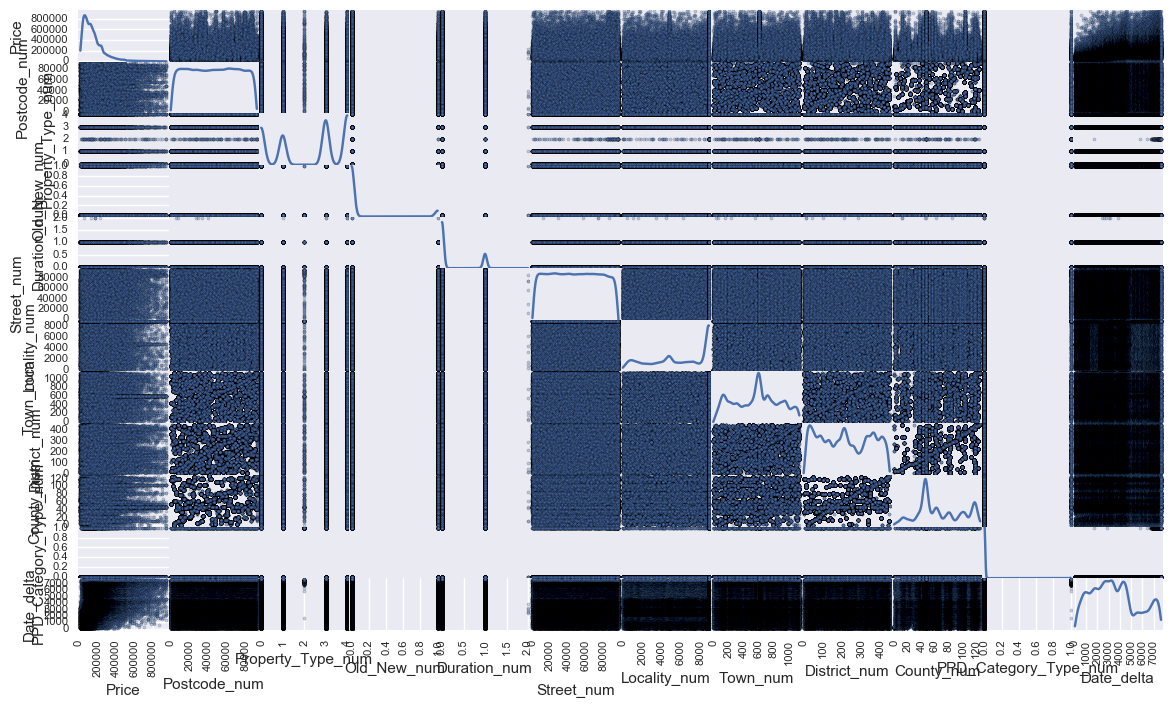

In [109]:
#Before PCA, let's see normal distribution.

pd.scatter_matrix(good_train_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [110]:
#Nothing is normal distribution

from scipy import stats

for col in good_train_data.columns:
    
    feature = good_train_data[col]
    norm_results = stats.normaltest(feature, axis=0)
    print col, norm_results # low p-value indicates data not likely to come from normal distribution

Price NormaltestResult(statistic=45187.530298158992, pvalue=0.0)
Postcode_num NormaltestResult(statistic=87773.349347288691, pvalue=0.0)
Property_Type_num NormaltestResult(statistic=1369.5912700221195, pvalue=3.9539801368045838e-298)
Old_New_num NormaltestResult(statistic=48717.076873604703, pvalue=0.0)
Duration_num NormaltestResult(statistic=17222.435030436907, pvalue=0.0)
Street_num NormaltestResult(statistic=83323.105820193348, pvalue=0.0)
Locality_num NormaltestResult(statistic=138641.07929348497, pvalue=0.0)
Town_num NormaltestResult(statistic=28222.963698342701, pvalue=0.0)
District_num NormaltestResult(statistic=158955.62468919202, pvalue=0.0)
County_num NormaltestResult(statistic=26403.729929075696, pvalue=0.0)
PPD_Category_Type_num NormaltestResult(statistic=158961.59490852701, pvalue=0.0)
Date_delta NormaltestResult(statistic=20619.711459826238, pvalue=0.0)


Explained Variance: 
[  5.23692553e-01   4.67643768e-01   5.94508125e-03   2.65782198e-03
   5.15094350e-05]
cumsum(pca.explained_variance_ratio= 
[ 0.52369255  0.99133632  0.9972814   0.99993922  0.99999073]


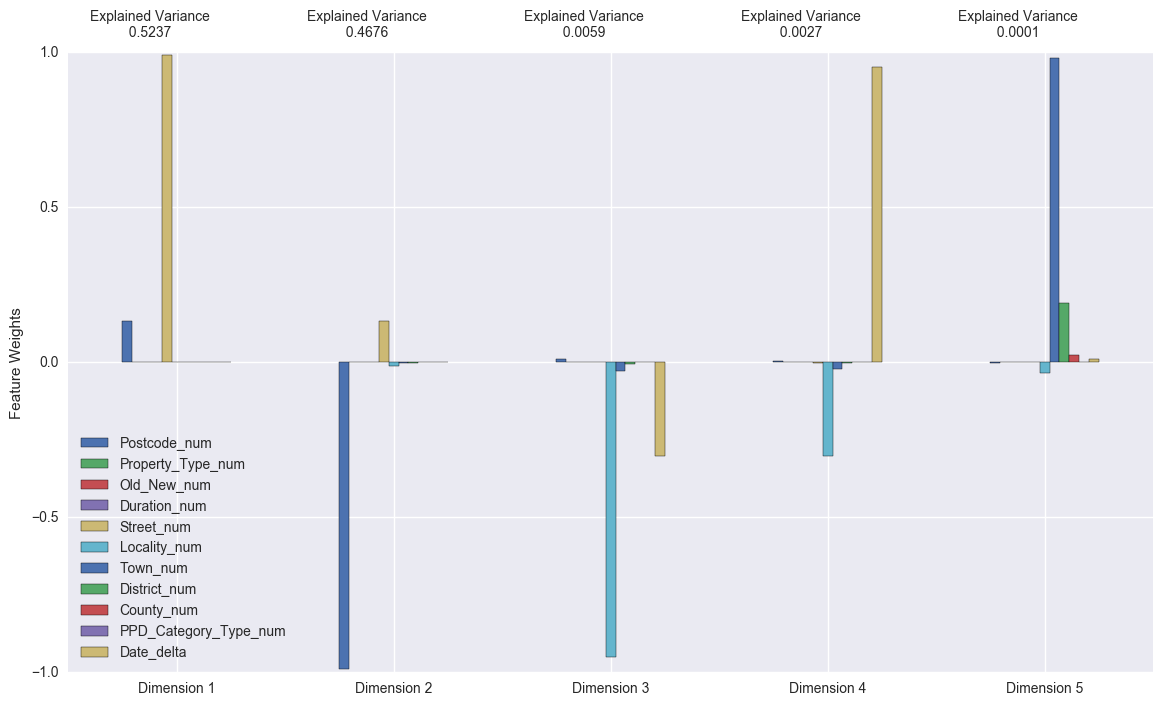

In [111]:
#Now do PCA 

from sklearn.decomposition import PCA
import visuals as vs

X=good_train_feature

# feature extraction
pca = PCA(n_components=5)

pca_train_X = pca.fit_transform(X)

# summarize components
print "Explained Variance: \n%s" % pca.explained_variance_ratio_
print "cumsum(pca.explained_variance_ratio= \n", np.cumsum(pca.explained_variance_ratio_)

# Generate PCA results plot
pca_results = vs.pca_results(X, pca)

In [112]:
pca_feature=good_train_feature[['Street_num','Postcode_num','Locality_num','Date_delta']]

'''
'Date_delta', 'Postcode_num', 'Property_Type_num', 
'Old_New_num', 'Duration_num', 'Street_num', 
'Locality_num', 'Town_num', 'District_num', 
'County_num', 'PPD_Category_Type_num'
'''

"\n'Date_delta', 'Postcode_num', 'Property_Type_num', \n'Old_New_num', 'Duration_num', 'Street_num', \n'Locality_num', 'Town_num', 'District_num', \n'County_num', 'PPD_Category_Type_num'\n"

/Users/parksoy/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
The default value for 'return_type' will change to 'axes' in a future release.
 To use the future behavior now, set return_type='axes'.
 To keep the previous behavior and silence this warning, set return_type='dict'.
  from ipykernel import kernelapp as app


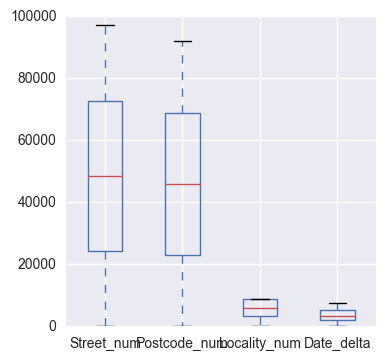

In [113]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(4, 4))
pca_feature.boxplot()
plt.show()

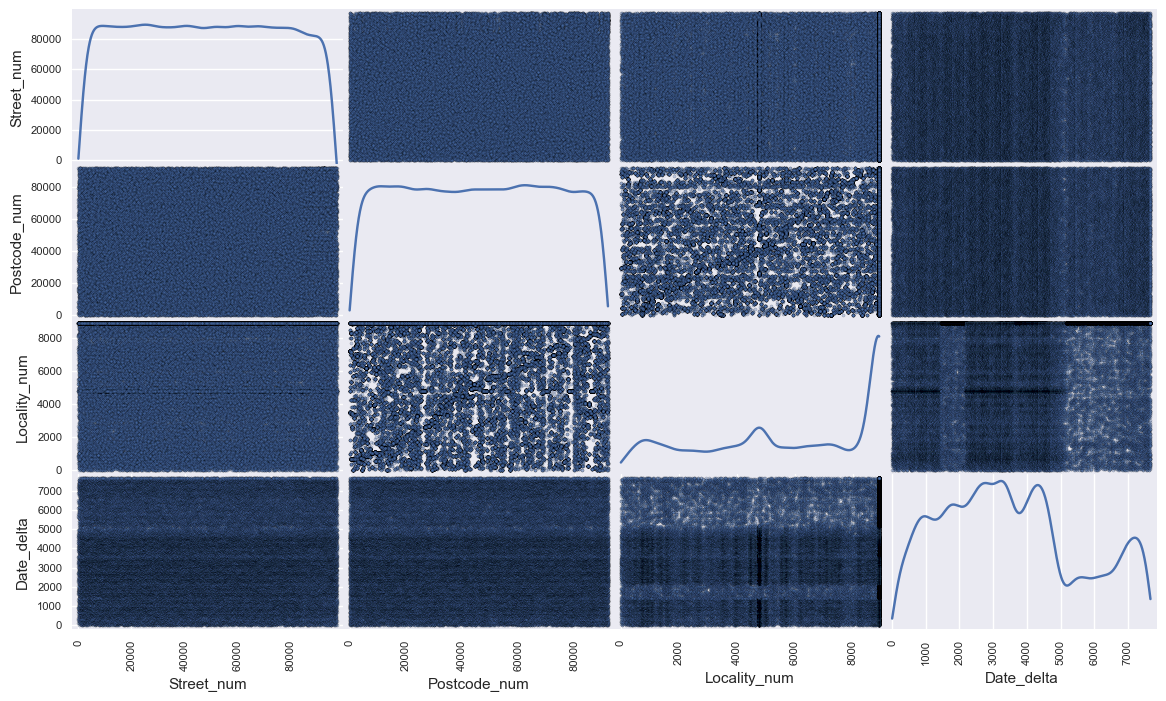

In [114]:
pd.scatter_matrix(pca_feature, alpha = 0.3, figsize = (14,8), diagonal = 'kde');


In [115]:
#Refit-EVEN GOT WORSE. 

pca_question_feature=df_question_feature[['Street_num','Postcode_num','Locality_num','Date_delta']]

X_train, X_test, y_train, y_test = train_test_split(pca_feature, good_train_target, test_size=0.4, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

regressor = RandomForestRegressor()
y_train_pred, y_test_pred, y_question_pred=train_predict_evaluate(regressor,X_train, y_train,X_test,pca_question_feature) #return price as dataframe 


(58646, 4) (39098, 4) (58646,) (39098,)
****regressor==***** <class 'sklearn.ensemble.forest.RandomForestRegressor'>

****Evaluation of regression in trainset****
R^2 == 0.908083237145
RMSE== 0.22328683611

****Evaluation of regression in testset****
R^2 == 0.48740256768
RMSE== 0.527159230358


### Problem #2. Overfitting. RMSE in testset>> trainset with RandomForest

In [116]:
display(good_train_target.describe())
print good_train_target.shape

count     97744.000000
mean     158646.868186
std      126113.683518
min       15480.000000
25%       72950.000000
50%      126000.000000
75%      200000.000000
max      950000.000000
Name: Price, dtype: float64

(97744,)


In [124]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor

X=pca_feature
y=good_train_target
y_log=np.log(good_train_target)

#RandomForest
parameters = [{"n_estimators": [250,500]}]
model=RandomForestRegressor()
from sklearn.model_selection import ShuffleSplit
cv = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)

grid_search = GridSearchCV(model, parameters, cv=cv, scoring="neg_mean_squared_error", verbose=1, n_jobs=-1)
grid_search.fit(X, y_log)

y_train_pred=grid_search.predict(X)

RMSE=np.sqrt((np.sum((y_train_pred-y_log)**2))/len(y_train_pred))

import math
print "Best_hyperparameter_set=",str(grid_search.best_params_), "with predefined RMSE score=",math.sqrt(-1*grid_search.best_score_)
print "My RMSE calculation=", RMSE

Fitting 10 folds for each of 2 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 32.1min finished


Best_hyperparameter_set= {'n_estimators': 500} with predefined RMSE score= 0.495345362841
My RMSE calculation= 0.180592262378


In [125]:
y_train_pred=grid_search.predict(X[len(X)/4*3:])

RMSE=np.sqrt((np.sum((y_train_pred-y_log[len(X)/4*3:])**2))/len(y_train_pred))
print RMSE

0.172814258029


In [126]:
#Refit-EVEN GOT WORSE. 

pca_question_feature=df_question_feature[['Street_num','Postcode_num','Locality_num','Date_delta']]

X_train, X_test, y_train, y_test = train_test_split(pca_feature, np.log(good_train_target), test_size=0.4, random_state=0)
print X_train.shape, X_test.shape, y_train.shape, y_test.shape

y_train_pred=grid_search.predict(X_train)
y_test_pred=grid_search.predict(X_test)
y_question_pred=grid_search.predict(pca_question_feature)


(58646, 4) (39098, 4) (58646,) (39098,)


In [127]:
y_train_pred=np.exp(y_train_pred)
y_test_pred=np.exp(y_test_pred)
y_question_pred=np.exp(y_question_pred)
y_test=np.exp(y_test)

'''
y_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)
y_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)
'''    

"\ny_train_pred = pd.DataFrame({'y_train_pred':y_train_pred}, index=y_train.index)\ny_test_pred = pd.DataFrame({'y_test_pred':y_test_pred}, index=y_test.index)\n"

(array([ -50000.,       0.,   50000.,  100000.,  150000.,  200000.,
         250000.,  300000.]), <a list of 8 Text xticklabel objects>)

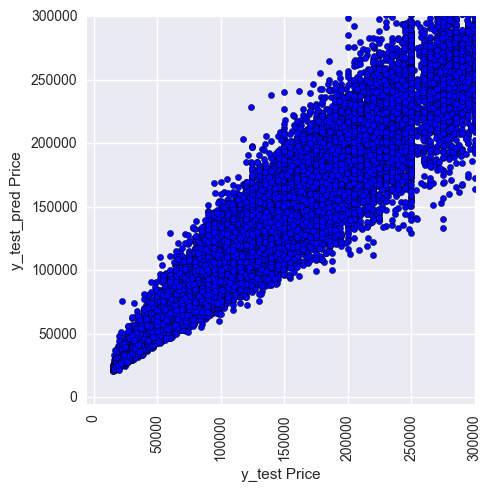

In [128]:
plt.rcParams['figure.figsize'] = (5, 5)

fig, ax = plt.subplots()

ax.scatter(y_test, y_test_pred)
ax.set_xlabel('y_test Price')
ax.set_ylabel('y_test_pred Price')
ax.set_xlim([-5000,300000])
ax.set_ylim([-5000,300000])
plt.xticks(rotation='vertical')

# query 

In [123]:
querylist=[99420,99857,99750,99899,99712,99481,99019,99493,99505,99563]

df_merged_question=y_question_pred.join(df_question_feature)
for i, x in enumerate(querylist):
    queryindex=x
    print "Question",i+1,"'y_question_pred'for ID==",queryindex, "\n", df_merged_question.loc[queryindex]['y_question_pred']


Question 1 'y_question_pred'for ID== 99420 
103777.93803
Question 2 'y_question_pred'for ID== 99857 
251885.531283
Question 3 'y_question_pred'for ID== 99750 
243451.655074
Question 4 'y_question_pred'for ID== 99899 
377015.710922
Question 5 'y_question_pred'for ID== 99712 
301706.603075
Question 6 'y_question_pred'for ID== 99481 
351850.972229
Question 7 'y_question_pred'for ID== 99019 
210879.623393
Question 8 'y_question_pred'for ID== 99493 
260845.21715
Question 9 'y_question_pred'for ID== 99505 
200915.699532
Question 10 'y_question_pred'for ID== 99563 
217147.644286
